In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [27]:
data_dir = 'C:/Users/Windows10/Desktop/코딩/data/jena_climate_2009_2016.csv'

df = pd.read_csv(data_dir)

df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [28]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
    
    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i + target_size])

    return np.array(data), np.array(labels)

In [29]:
train_split = 300000

tf.random.set_seed(11)

In [30]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(-100000.0, 0, '03.02.2015 11:20:00'),
  Text(0.0, 0, '01.01.2009 00:10:00'),
  Text(100000.0, 0, '25.11.2010 11:10:00'),
  Text(200000.0, 0, '19.10.2012 21:50:00'),
  Text(300000.0, 0, '13.09.2014 02:20:00'),
  Text(400000.0, 0, '08.08.2016 04:50:00'),
  Text(500000.0, 0, '')])

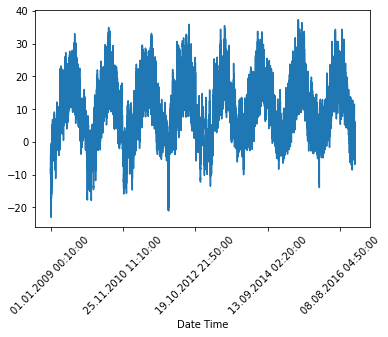

In [32]:
uni_data.plot(subplots = True)
plt.xticks(rotation = 45)

In [33]:
uni_data = uni_data.values

In [34]:
uni_train_mean = uni_data[:train_split].mean()
uni_train_std = uni_data[:train_split].std()

uni_data = (uni_data - uni_train_mean) / uni_train_std

In [35]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, train_split, univariate_past_history, univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, train_split, None, univariate_past_history, univariate_future_target)

In [37]:
print('Single window of past history\n {}'.format(x_train_uni[0]))
print('\ntarget temperature to predict\n {}'.format(y_train_uni[0]))

Single window of past history
 [[-1.99766294]
 [-2.04281897]
 [-2.05439744]
 [-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]]

target temperature to predict
 -2.1041848598100876


In [38]:
def create_time_steps(length):
    return list(range(-length, 0))

In [46]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize = 10, label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel('Time Step')

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Windows10\\anaconda3\\envs\\tf_2.0\\lib\\site-packages\\matplotlib\\pyplot.py'>

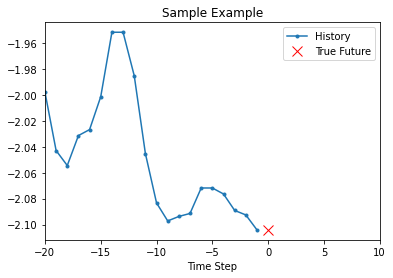

In [47]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [48]:
# baseline : 학습하기 전 기준 설정

def baseline(history):
    return np.mean(history)

    

<module 'matplotlib.pyplot' from 'C:\\Users\\Windows10\\anaconda3\\envs\\tf_2.0\\lib\\site-packages\\matplotlib\\pyplot.py'>

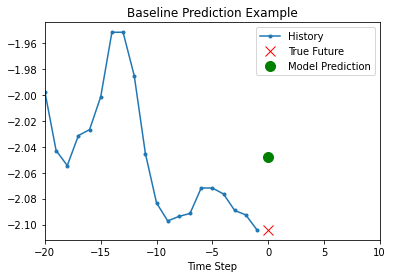

In [50]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])],0, 'Baseline Prediction Example')

In [51]:
batch_size = 256
buffer_size = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(batch_size).repeat()

In [52]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape = x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer = 'adam', loss= 'mae')

In [53]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [54]:
evaluation_interval =  200
epochs = 10

simple_lstm_model.fit(train_univariate, epochs = epochs, steps_per_epoch= evaluation_interval, validation_data= val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 5s 10ms/step - loss: 0.4823 - val_loss: 0.0856
Epoch 2/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0968 - val_loss: 0.0333
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0459 - val_loss: 0.0262
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0423 - val_loss: 0.0226
Epoch 5/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0257 - val_loss: 0.0210
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0282 - val_loss: 0.0201
Epoch 7/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0263 - val_loss: 0.0187
Epoch 8/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0239 - val_loss: 0.0172
Epoch 9/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0234 - val_loss: 0.0171
Epoch 10/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0216 - val_loss

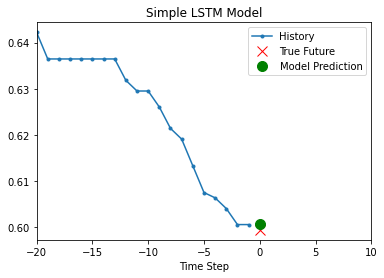

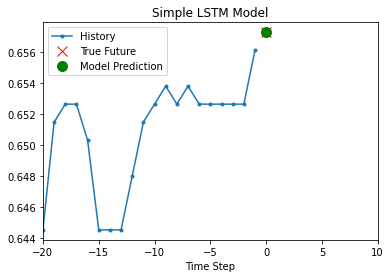

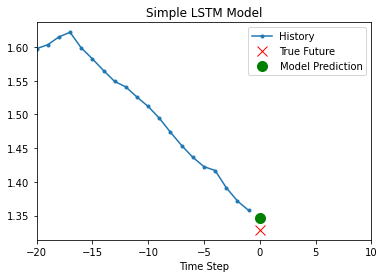

In [55]:
for x, y in val_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(), simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM Model')
    plot.show()